<a href="https://colab.research.google.com/github/jasantos1976/pucrioMVP1/blob/main/mvp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Definição do Problema

O dataset utilizado nesse MVP foi montado a partir da combinação de diversos arquivos csv extraídos do site do Ministério da Economia e são responsáveis por montar as estatísticas da Balança Comercial Brasileira. Como a combinação dos arquivos geraram um dataset com quase 260Mb de tamanho apenas para o primeiro trimestre de 2023, uma seleção para redução do arquivo de análise nesse MVP foi utilizada, conforme descrição a seguir: 

**O dataset representa 80k linhas da balança comercial, dividido em 40k linhas representando as importações de março de 2023 e 40k linhas representando as exportações de março de 2023**. Não foram utilizados critérios específicos para geração do arquivo, apenas um top(40000) para importações e um top(40000) para as exportações no período descrito anteriormente.


Os arquivos originais podem ser obtidos pelo site https://www.gov.br/produtividade-e-comercio-exterior/pt-br/assuntos/comercio-exterior/estatisticas/base-de-dados-bruta



**OBJETIVO**: Verificar nesse conjunto de dados se a balança está equilibrada ou se estamos tendendo mais a importação ou exportação. Visualizar também a seção que mais pesa na balança.


**ATRIBUTOS NESSE DATASET**
1. CO_TIPO - Indica se a linha representação importação (IMP) ou exportação (EXP)
2. CO_ANO - Indica o ano do levantamento estatístico
3. CO_MES - Indica o mês do lavantamento estatístico
4. CO_NCM - Código que representa a Nomenclatura Comum do Mercosul (NCM)
5. CO_SH6 - Código que representa o Sistema Harmonizado
6. CO_SH2 - Código que representa o agrupamento por Capítulo 
7. CO_NCM_SECAO - Código romano que representa as seções da NCM
8. NO_NCM_SECAO - Nome que representa a seção da NCM
9. NO_NCM_PT - Nome que representa o produto na NCM em português
10. SG_UNID - Representa a unidade que o produto foi comercializado
11. CO_PAIS_ISOA3 - Código que representa o sistema de 3 letras (alfa-3) da ISO 3166-1 para nomenclatura de países
12. NO_PAIS - Nome do país em português 
13. SG_UF_NCM - Representa a UF de origem das importações e exportações
14. NO_VIA - Via utilizada no transporte das mercadorias
15. CO_URF - Representa a Unidade de Jurisdição de despacho/embarque da RFB
16. QT_ESTAT - Representa os produtos em quantidade conforme a unidade
17. KG_LIQUIDO - Representa os produtos em quilograma líquido
18. VL_FOB - Representa a imp. ou exp. em valor FOB(US$)
19. VL_FRETE - (Apenas importação) - Representa o valor do frete da mercadoria
20. VL_SEGURO - (Apenas importação) - Representa o valor do seguro da mercadoria

# 2. Importações das bibliotecas


In [1]:
import pandas as pd
import numpy as np
## Criação de gráficos e visualizações
import matplotlib.pyplot as plt
import matplotlib as mpl
## utilizado para tratamento de missings
import missingno as ms 
## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
## Dividir dados de teste e treino
from sklearn.model_selection import train_test_split


# 3. Carga do Dataset

In [2]:
# Atribui o caminho do dataset a variavel url
url = "https://raw.githubusercontent.com/jasantos1976/pucrioMVP1/main/DS_MVP1_80K_UTF8.csv"

# Carrega os dados do arquivo para a variável dsImpExp
# Na primeira carga, percebeu-se que a tipagem de alguns atributos estavam 
# incorretas. Casos como a NCM que possuem 8 dígitos e que podem começar com 
# zeros, a carga como int remove esse zero à esquerda e isso incorrerá em erro 
# pois haverá combinações não desejadas entre nomenclaturas. Diante disso, a 
# carga inicial para o dataframe já terá esses atributos transformados

# Dicionário com os atributos e tipos corretos
dicAtributos = {'CO_ANO' : np.str_ , 
                'CO_MES' : np.str_ , 
                'CO_NCM' : np.str_ , 
                'CO_SH6' : np.str_ ,  
                'CO_SH2' : np.str_ , 
                'CO_URF' : np.str_  }

# Cria o dataframe passando os atributos com seus respectivos tipos                
dfImpExp = pd.read_csv(url, delimiter=';', dtype=dicAtributos)


# 4. Análise Exploratória


### 4.1 Informações gerais

In [3]:
# Exibe a dimensão do dataset
dfImpExp.shape


(80000, 20)

In [4]:
# Exibe as primeiras 10 linhas do dataset
dfImpExp.head(n=10)


,CO_TIPO,CO_ANO,CO_MES,CO_NCM,CO_SH6,CO_SH2,CO_NCM_SECAO,NO_SECAO_PT,NO_NCM_PT,SG_UNID,CO_PAIS_ISOA3,NO_PAIS,SG_UF_NCM,NO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
0,IMP,2023,03,01012100,010121,01,I,Animais vivos e produtos do reino animal,Cavalos reprodutores de raça pura,UNID.,ARG,Argentina,RS,RODOVIARIA,1017500,11,5500,38500,3000.0,0.0
1,IMP,2023,03,01031000,010310,01,I,Animais vivos e produtos do reino animal,Suínos reprodutores de raça pura,UNID.,USA,Estados Unidos,PR,AEREA,0817700,857,61540,520414,334279.0,1043.0
2,IMP,2023,03,01051110,010511,01,I,Animais vivos e produtos do reino animal,"Galos e galinhas, peso <= 185 g, de linha pura...",UNID.,ESP,Espanha,SP,AEREA,0817600,16720,669,84980,14254.0,0.0
3,IMP,2023,03,01063900,010639,01,I,Animais vivos e produtos do reino animal,Outras aves vivas,UNID.,PRT,Portugal,SP,AEREA,0817600,80,1,1520,422.0,0.0
4,IMP,2023,03,02013000,020130,02,I,Animais vivos e produtos do reino animal,"Carnes desossadas de bovino, frescas ou refrig...",KGL,ARG,Argentina,SP,RODOVIARIA,1017500,82070,82070,893872,8352.0,2200.0
5,IMP,2023,03,02013000,020130,02,I,Animais vivos e produtos do reino animal,"Carnes desossadas de bovino, frescas ou refrig...",KGL,PRY,Paraguai,MG,RODOVIARIA,0917500,330281,330281,2255520,19078.0,0.0
6,IMP,2023,03,02013000,020130,02,I,Animais vivos e produtos do reino animal,"Carnes desossadas de bovino, frescas ou refrig...",KGL,URY,Uruguai,RS,RODOVIARIA,1010252,11586,11586,102311,800.0,141.0
7,IMP,2023,03,02023000,020230,02,I,Animais vivos e produtos do reino animal,"Carnes desossadas de bovino, congeladas",KGL,ARG,Argentina,BA,MARITIMA,0517800,3206,3206,40641,163.0,80.0
8,IMP,2023,03,02023000,020230,02,I,Animais vivos e produtos do reino animal,"Carnes desossadas de bovino, congeladas",KGL,ARG,Argentina,MG,RODOVIARIA,1017500,21833,21833,186605,1800.0,0.0
9,IMP,2023,03,02023000,020230,02,I,Animais vivos e produtos do reino animal,"Carnes desossadas de bovino, congeladas",KGL,ARG,Argentina,SC,RODOVIARIA,1017503,68660,68660,614633,4179.0,0.0


In [5]:
# Exibe as últimas 10 linhas 
dfImpExp.tail(n=10)


,CO_TIPO,CO_ANO,CO_MES,CO_NCM,CO_SH6,CO_SH2,CO_NCM_SECAO,NO_SECAO_PT,NO_NCM_PT,SG_UNID,CO_PAIS_ISOA3,NO_PAIS,SG_UF_NCM,NO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
79990,EXP,2023,03,25161100,251611,25,V,Produtos minerais,Granito em bruto ou desbastado,M3,ITA,Itália,MG,MARITIMA,0727600,9,24540,30540,NaN,NaN
79991,EXP,2023,03,25161100,251611,25,V,Produtos minerais,Granito em bruto ou desbastado,M3,ITA,Itália,PI,MARITIMA,0317900,42,149780,50032,NaN,NaN
79992,EXP,2023,03,25181000,251810,25,V,Produtos minerais,"Dolomita não calcinada nem sinterizada, denomi...",KGL,BOL,Bolívia,SP,RODOVIARIA,0147600,9000,9000,1931,NaN,NaN
79993,EXP,2023,03,25181000,251810,25,V,Produtos minerais,"Dolomita não calcinada nem sinterizada, denomi...",KGL,ITA,Itália,ES,MARITIMA,0727600,209140,209140,97597,NaN,NaN
79994,EXP,2023,03,25181000,251810,25,V,Produtos minerais,"Dolomita não calcinada nem sinterizada, denomi...",KGL,PRY,Paraguai,PR,RODOVIARIA,0147700,7072000,7072000,152959,NaN,NaN
79995,EXP,2023,03,25181000,251810,25,V,Produtos minerais,"Dolomita não calcinada nem sinterizada, denomi...",KGL,PRY,Paraguai,PR,RODOVIARIA,0147800,32000,32000,1066,NaN,NaN
79996,EXP,2023,03,25181000,251810,25,V,Produtos minerais,"Dolomita não calcinada nem sinterizada, denomi...",KGL,URY,Uruguai,PR,RODOVIARIA,1017701,68750,68750,3578,NaN,NaN
79997,EXP,2023,03,25181000,251810,25,V,Produtos minerais,"Dolomita não calcinada nem sinterizada, denomi...",KGL,URY,Uruguai,RS,RODOVIARIA,1010253,1311800,1311800,24312,NaN,NaN
79998,EXP,2023,03,25181000,251810,25,V,Produtos minerais,"Dolomita não calcinada nem sinterizada, denomi...",KGL,USA,Estados Unidos,CE,AEREA,0817700,1,1,5,NaN,NaN
79999,EXP,2023,03,30061010,300610,30,VI,Produtos das indústrias químicas ou indústrias...,"Materiais para suturas cirúrgicas, de polidiex...",KGL,MEX,México,MG,AEREA,0817700,338,338,25859,NaN,NaN


In [6]:
# Exibe o tipo de dado de cada atributo carregado no dataframe
dfImpExp.dtypes


CO_TIPO           object
CO_ANO            object
CO_MES            object
CO_NCM            object
CO_SH6            object
CO_SH2            object
CO_NCM_SECAO      object
NO_SECAO_PT       object
NO_NCM_PT         object
SG_UNID           object
CO_PAIS_ISOA3     object
NO_PAIS           object
SG_UF_NCM         object
NO_VIA            object
CO_URF            object
QT_ESTAT           int64
KG_LIQUIDO         int64
VL_FOB             int64
VL_FRETE         float64
VL_SEGURO        float64
dtype: object

In [7]:
# Faz um resumo estatístico do dataframe (média, desvio padrão, mínimo, 
# máximo e os quartis)
dfImpExp.describe()


,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
count,8.000000e+04,8.000000e+04,8.000000e+04,4.000000e+04,40000.000000
mean,1.243883e+05,2.866169e+05,2.188566e+05,6.898925e+03,103.881125
std,3.967723e+06,1.040454e+07,5.784590e+06,1.099202e+05,2727.756247
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,6.000000e+00,6.000000e+00,7.100000e+01,2.000000e+01,0.000000
50%,3.900000e+01,4.000000e+01,6.190000e+02,2.230000e+02,1.000000
75%,7.500000e+02,6.682500e+02,1.298300e+04,1.538000e+03,13.000000
max,6.372334e+08,1.868405e+09,1.035798e+09,1.630304e+07,466180.000000


Propositalmente foi deixado o atributo [VL_FOB] como int durante a carga
inicial. O valor será convertido para float para ficar mais coerente. 

In [8]:
# Convertendo a coluna para a tipagem correta
dfImpExp["VL_FOB"] = dfImpExp["VL_FOB"].astype(float)


In [9]:
# Exibe o tipo de dado de cada atributo carregado no dataframe após a alteração
dfImpExp.dtypes


CO_TIPO           object
CO_ANO            object
CO_MES            object
CO_NCM            object
CO_SH6            object
CO_SH2            object
CO_NCM_SECAO      object
NO_SECAO_PT       object
NO_NCM_PT         object
SG_UNID           object
CO_PAIS_ISOA3     object
NO_PAIS           object
SG_UF_NCM         object
NO_VIA            object
CO_URF            object
QT_ESTAT           int64
KG_LIQUIDO         int64
VL_FOB           float64
VL_FRETE         float64
VL_SEGURO        float64
dtype: object

Com os dados agora tipados de forma correta, podemos fazer uma descrição estatística mais coerente.

In [10]:
# Faz um resumo estatístico do dataframe (média, desvio padrão, mínimo, 
# máximo e os quartis)
dfImpExp.describe()


,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
count,8.000000e+04,8.000000e+04,8.000000e+04,4.000000e+04,40000.000000
mean,1.243883e+05,2.866169e+05,2.188566e+05,6.898925e+03,103.881125
std,3.967723e+06,1.040454e+07,5.784590e+06,1.099202e+05,2727.756247
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,6.000000e+00,6.000000e+00,7.100000e+01,2.000000e+01,0.000000
50%,3.900000e+01,4.000000e+01,6.190000e+02,2.230000e+02,1.000000
75%,7.500000e+02,6.682500e+02,1.298300e+04,1.538000e+03,13.000000
max,6.372334e+08,1.868405e+09,1.035798e+09,1.630304e+07,466180.000000


In [11]:
# Verifica a distribuição de classes (importação e exportação)
# Considerando que o dataset foi extraído e equilibrado em número de transações
# (não valores), a distribuição de classes utilizando o atributo [CO_TIPO] que 
# indica que foi importação e exportação está balanceada

dfImpExp.groupby('CO_TIPO').size()


CO_TIPO
EXP    40000
IMP    40000
dtype: int64

Considerando que o dataset foi extraído e equilibrado em número de transações
(não valores), a distribuição de classes utilizando o atributo [CO_TIPO] que
indica que foi importação e exportação está equilibrado.

In [12]:
# Visualizando a frequência de dados de alguns atributos chaves que serão 
# utilizados para análise desse dataset

print(dfImpExp['CO_TIPO'].value_counts())


IMP    40000
EXP    40000
Name: CO_TIPO, dtype: int64


In [13]:
print(dfImpExp['CO_NCM_SECAO'].value_counts())


II       16287
XVI      15884
IV       14096
I         9003
XV        5043
VI        4177
VII       3982
XVIII     2900
XI        2032
XVII      1574
III       1260
XX         887
XIII       846
V          657
X          605
VIII       304
XII        244
IX         121
XIV         77
XIX         19
XXI          2
Name: CO_NCM_SECAO, dtype: int64


In [14]:
print(dfImpExp['NO_SECAO_PT'].value_counts())


Produtos do reino vegetal                                                                                                                                                                                                          16287
Máquinas e aparelhos, material elétrico e suas partes; Aparelhos de gravação ou reprodução de som, aparelhos de gravação ou reprodução de imagens e de som em televisão, e suas partes e acessórios                                15884
Produtos das indútrias alimentares; Bebidas, líquidos alcoólicos e vinagres; Tabaco e seus sucedâneos manufaturados                                                                                                                14096
Animais vivos e produtos do reino animal                                                                                                                                                                                            9003
Metais comuns e suas obras                                          

In [15]:
print(dfImpExp['NO_PAIS'].value_counts())


China                                    8480
Estados Unidos                           5568
Alemanha                                 4059
Marshall, Ilhas                          3757
Libéria                                  3420
                                         ... 
Salomão, Ilhas                              1
Palau                                       1
Território Britânico do Oceano Índico       1
Andorra                                     1
Virgens, Ilhas (Americanas)                 1
Name: NO_PAIS, Length: 208, dtype: int64


In [16]:
print(dfImpExp['SG_UF_NCM'].value_counts())


SP    24921
SC     8566
RJ     7733
PR     6636
RS     5873
ES     4374
MG     4293
AM     2594
MA     2443
PA     2299
BA     2194
AL     1976
CE     1244
GO     1241
PE      897
MS      448
MT      422
RO      359
AP      353
RN      249
DF      245
PB      157
SE      129
RR      101
TO       93
PI       86
ND       50
AC       24
Name: SG_UF_NCM, dtype: int64


Na visualização de frequência da UFs, percebe-se uma sigla que não representa
oficialmente uma unidade da federação, a sigla "ND". Em análise aos documentos
da fonte de dados, ficou esclarecido que há outras possibilidades inclusive:

*   ND - Não Declarada
*   ED - Estados Diversos - Café
*   RE - Reexportação
*   MN - Mercadoria Nacionalizada
*   CB - Consumo de Bordo
*   EX - Exterior
*   ZN - Zona Não Declarada



In [17]:
print(dfImpExp['NO_VIA'].value_counts())


MARITIMA                       55842
AEREA                          20934
RODOVIARIA                      2569
VIA NAO DECLARADA                351
ENTRADA/SAIDA FICTA              149
VICINAL FRONTEIRICO               86
MEIOS PROPRIOS                    36
EM MAOS                           26
FERROVIARIA                        3
POSTAL                             2
CONDUTO/REDE DE TRANSMISSAO        1
FLUVIAL                            1
Name: NO_VIA, dtype: int64


# 5. Pré-processamento de Dados

### 5.1 Tratamento de missings e limpeza


In [18]:
dfImpExp.isnull().sum()


CO_TIPO              0
CO_ANO               0
CO_MES               0
CO_NCM               0
CO_SH6               0
CO_SH2               0
CO_NCM_SECAO         0
NO_SECAO_PT          0
NO_NCM_PT            0
SG_UNID              0
CO_PAIS_ISOA3        0
NO_PAIS              0
SG_UF_NCM            0
NO_VIA               0
CO_URF               0
QT_ESTAT             0
KG_LIQUIDO           0
VL_FOB               0
VL_FRETE         40000
VL_SEGURO        40000
dtype: int64

Analisando o resultado apresentado acima, percebeu-se que o grande número de registros nulos nos atributos VL_FRETE E VL_SEGURO se dá porque eles não são preenchidos quando o [CO_TIPO] = "Exp". Para exportação não existe registro de frete e seguro.


<Axes: >

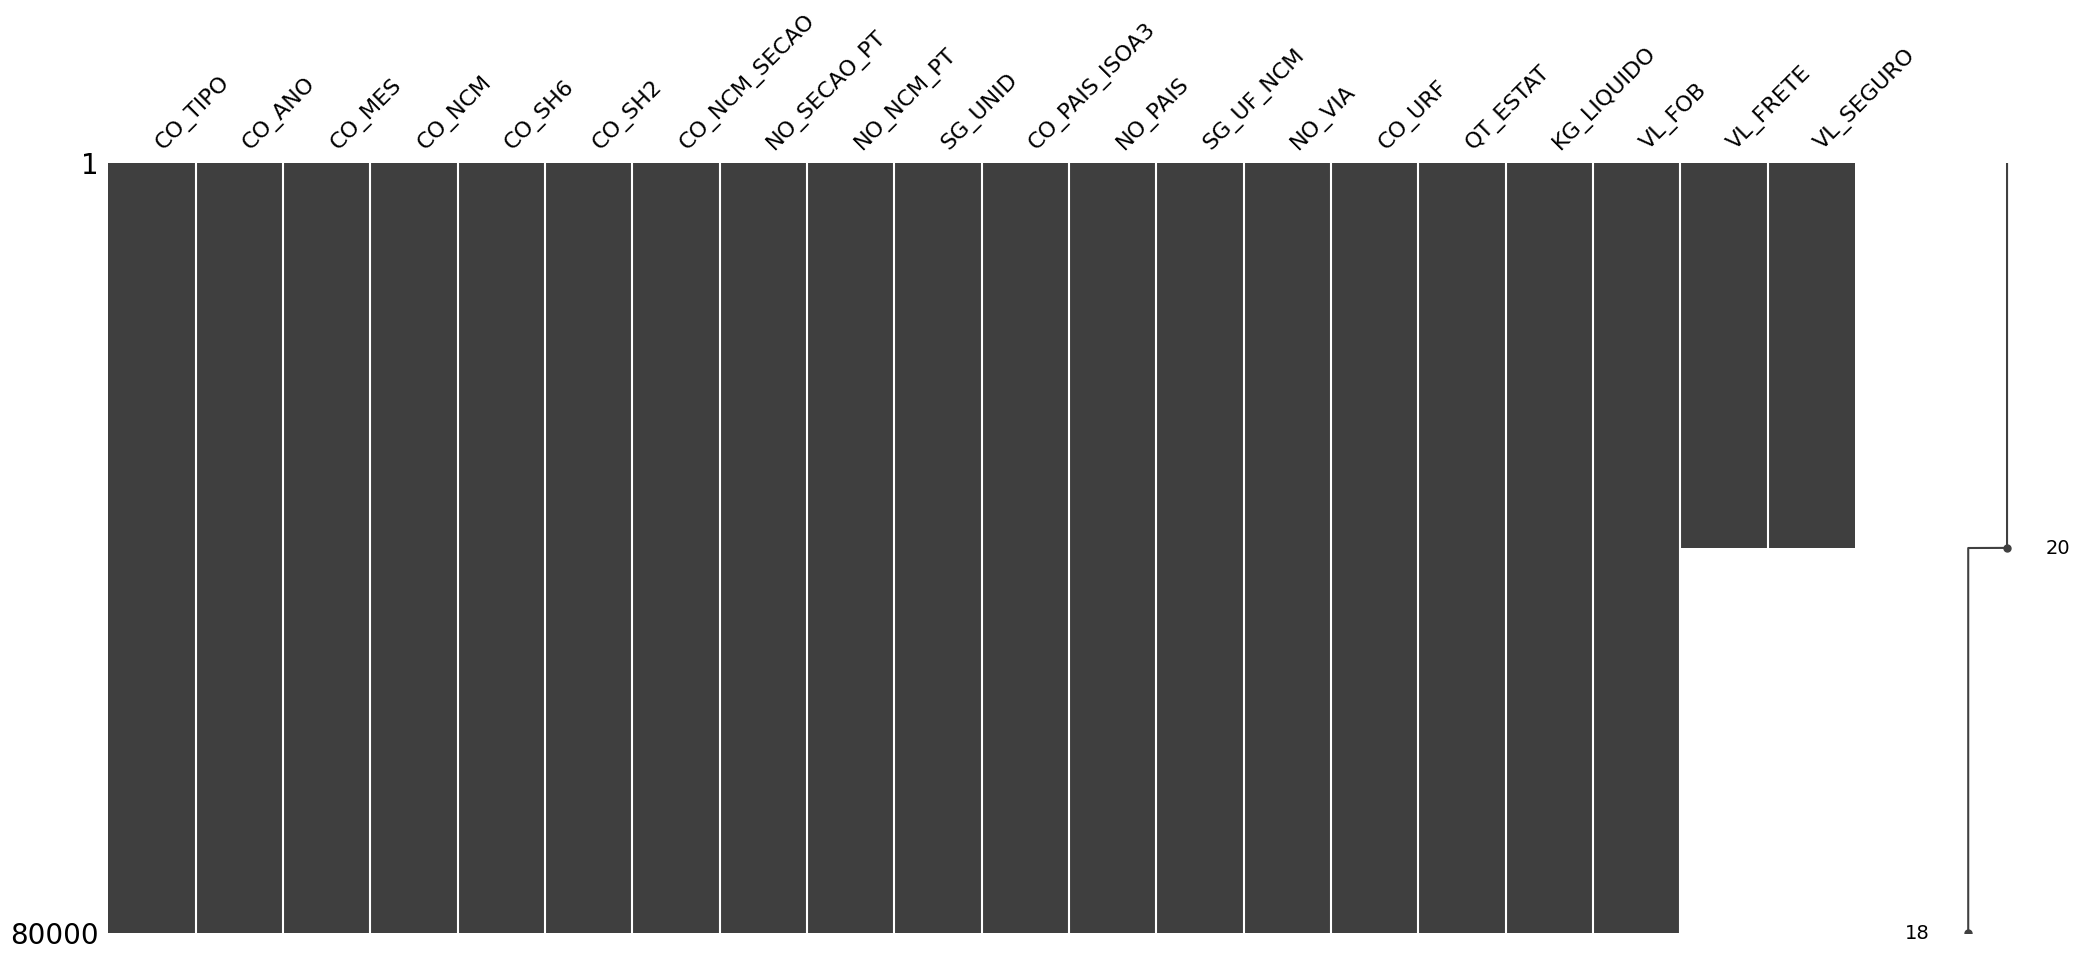

In [19]:
# Exibindo a matriz de nulidade do dataframe
ms.matrix(dfImpExp)


A matriz acima indica que exatamente a metade dos registros possuem registros nulos nos atributos VL_FRETE e VL_SEGURO, confirmando assim a afirmação que um dos tipos de operação não registra valor para frete e para seguro. Nenhuma ação será adicionada agora, visto que a visualização posterior com o agrupamento de valores por tipo de atividade, será determinante para o restante do trabalho.


### 5.2 Redução de dimensionalidade
#### 5.2.1 Seleção de características
Existem muitos atributos que não se fazem necessários nesse estudo. Pensando em
uma análise inicial quantitativa, a verificação seguinte indicará qual
modalidade será trabalhada para apresentação gráfica. A sequência é para validar
se no período (março/2023) tivemos mais exportação ou importação em US$ FOB.

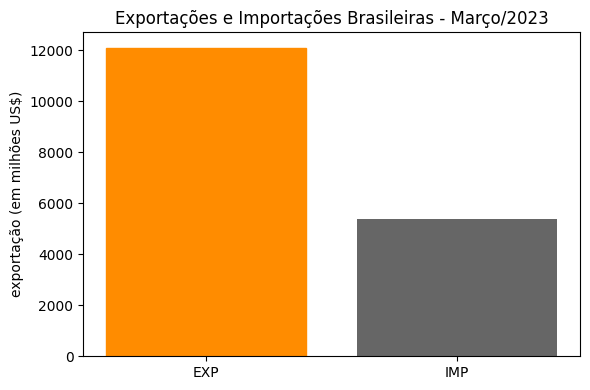

In [20]:
dfAgrupado = dfImpExp.groupby('CO_TIPO')['VL_FOB'].sum().reset_index()

# Prepara a figura (fig) e a área do gráfico (ax)
fig, ax = plt.subplots(figsize = (6, 4))

# Plota o gráfico de barras dividindo a soma do valor por 1000000
barras = ax.bar(dfAgrupado['CO_TIPO'], dfAgrupado['VL_FOB']/1e6, color='#666666')

# Acrescenta um título ao gráfico
plt.title('Exportações e Importações Brasileiras - Março/2023')

# Define os rótulos dos eixos
plt.ylabel('exportação (em milhões US$)') 

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

barras[0].set_color('#FF8C00')

# Exibe o gráfico
plt.show()


No conjunto de dados utilizado, verifica-se que temos mais exportações que importações.

Diante dessa ótica, farei uma **análise das exportações** considerando a unidade da federação que mais exporta, qual o principal meio de transporte das exportações, quais as seções envolvidas e qual detem as principais exportações. Sendo assim, farei a remoção de atributos que não serão relevantes nessa análise.

In [21]:
# Fechar o escopo da análise somente nas exportações e para isso vou montar 
# um dataframe apenas com as colunas e linhas que desejo visualizar essas
# informações

# Criando um dataframe apenas de Exportação
dfExp = dfImpExp['CO_TIPO'] == 'EXP'
dfExpFiltrado = dfImpExp[dfExp]

# Novo dataframe com colunas específicas
dfNewExp = dfExpFiltrado.loc[:
                             , ['CO_NCM_SECAO'
                             , 'NO_SECAO_PT'
                             , 'CO_PAIS_ISOA3'
                             , 'NO_PAIS'
                             , 'SG_UF_NCM'
                             , 'NO_VIA'
                             , 'VL_FOB']]

# Visualiza o novo dataframe
print(dfNewExp.head())


      CO_NCM_SECAO                               NO_SECAO_PT CO_PAIS_ISOA3  \
40000            I  Animais vivos e produtos do reino animal           CHE   
40001            I  Animais vivos e produtos do reino animal           HKG   
40002            I  Animais vivos e produtos do reino animal           NOR   
40003            I  Animais vivos e produtos do reino animal           ALB   
40004            I  Animais vivos e produtos do reino animal           ARE   

                      NO_PAIS SG_UF_NCM    NO_VIA    VL_FOB  
40000                   Suíça        MA  MARITIMA     469.0  
40001               Hong Kong        MA  MARITIMA      83.0  
40002                 Noruega        SP  MARITIMA     212.0  
40003                 Albânia        RS  MARITIMA  106310.0  
40004  Emirados Árabes Unidos        SC  MARITIMA   17508.0  


<Axes: >

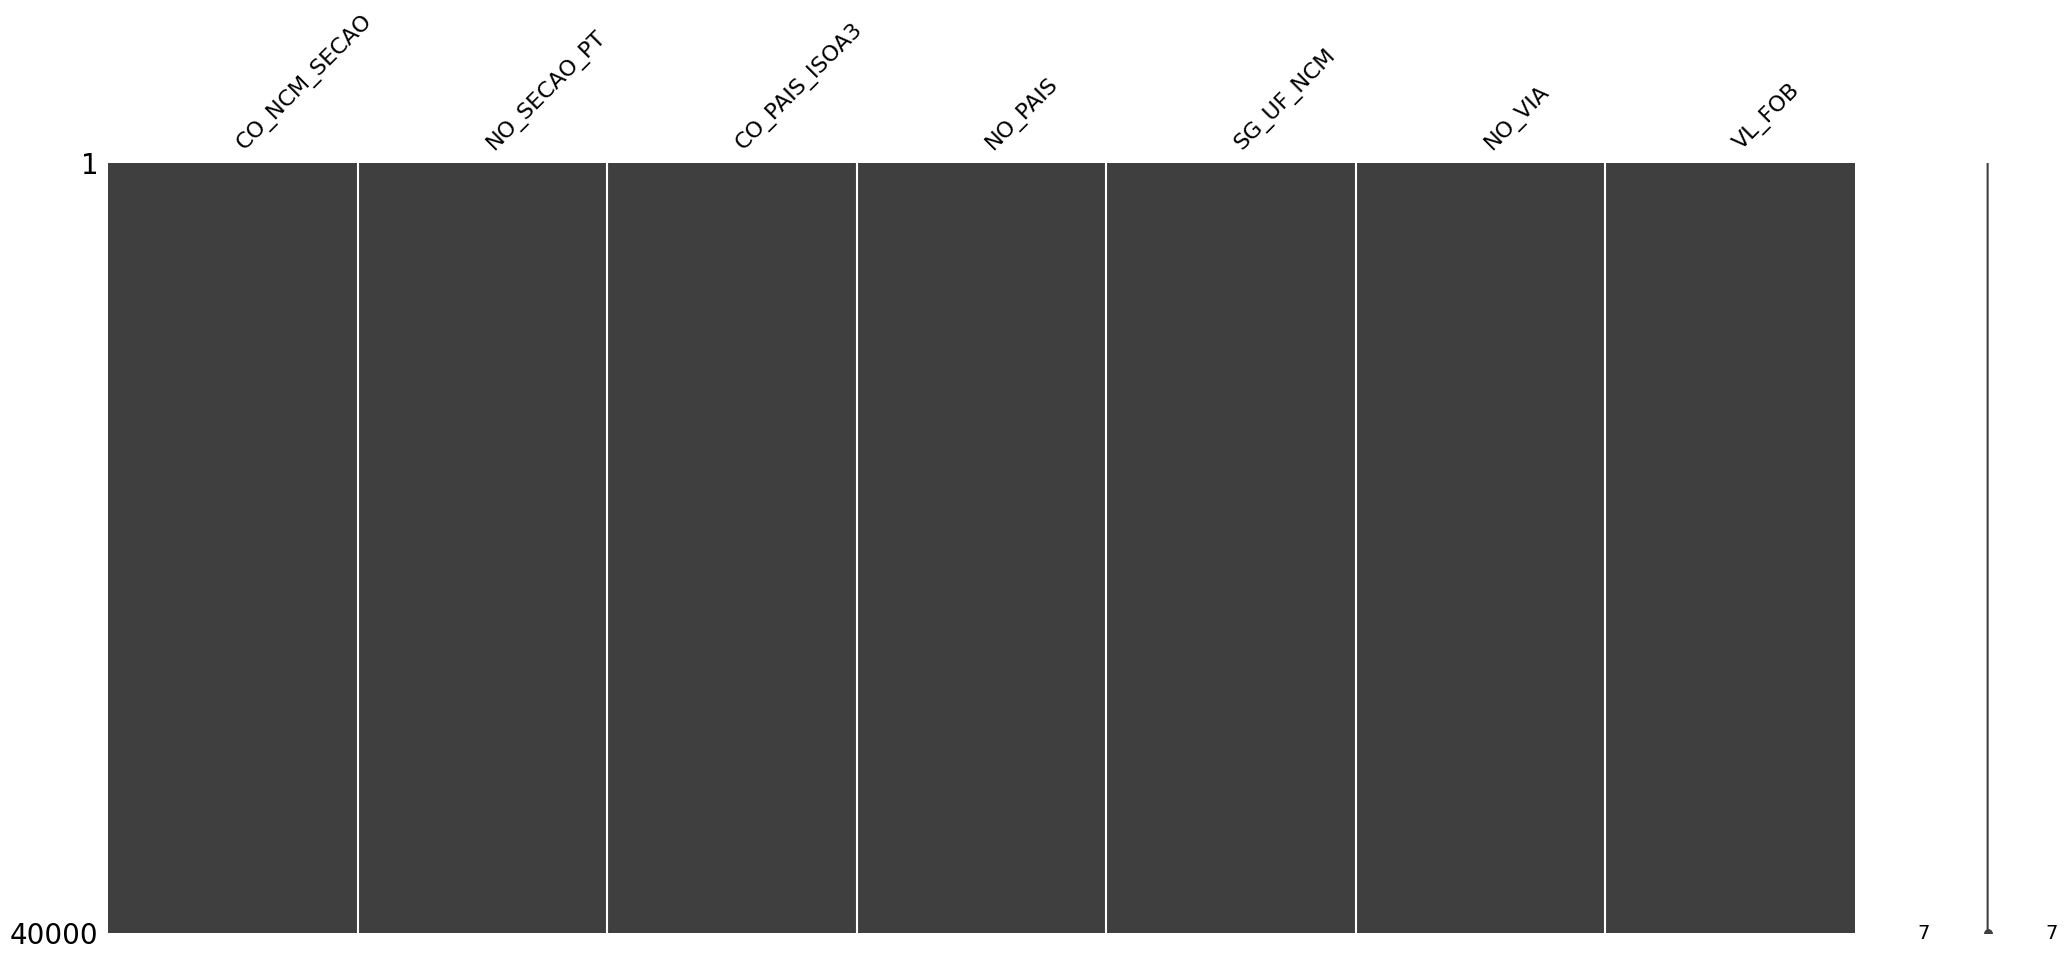

In [22]:
# Exibindo a matriz de nulidade do dataframe após exclusão das colunas e linhas
ms.matrix(dfNewExp)


In [23]:
# Exibindo as primeiras linhas do novo dataframe
dfNewExp.head(n=5)

,CO_NCM_SECAO,NO_SECAO_PT,CO_PAIS_ISOA3,NO_PAIS,SG_UF_NCM,NO_VIA,VL_FOB
40000,I,Animais vivos e produtos do reino animal,CHE,Suíça,MA,MARITIMA,469.0
40001,I,Animais vivos e produtos do reino animal,HKG,Hong Kong,MA,MARITIMA,83.0
40002,I,Animais vivos e produtos do reino animal,NOR,Noruega,SP,MARITIMA,212.0
40003,I,Animais vivos e produtos do reino animal,ALB,Albânia,RS,MARITIMA,106310.0
40004,I,Animais vivos e produtos do reino animal,ARE,Emirados Árabes Unidos,SC,MARITIMA,17508.0


In [24]:
# Fazendo uma descrição dos itens categóricos que são a maioria no dataframe
dfNewExp[['CO_NCM_SECAO', 'NO_SECAO_PT'
        , 'CO_PAIS_ISOA3', 'NO_PAIS'
        , 'SG_UF_NCM', 'NO_VIA']].describe()

,CO_NCM_SECAO,NO_SECAO_PT,CO_PAIS_ISOA3,NO_PAIS,SG_UF_NCM,NO_VIA
count,40000,40000,40000,40000,40000,40000
unique,6,6,194,194,28,9
top,II,Produtos do reino vegetal,MHL,"Marshall, Ilhas",SP,MARITIMA
freq,15931,15931,3757,3757,10137,36210


Como fechamos o escopo nas exportações, podemos observar que o conjunto de
registros foi filtrado corretamente, considerando que tínhamos exatamente 80k
linhas. Outras observações que podemos destacar são:


*   Das 21 Seções existentes na NCM, as exportações se concentraram em 6;
*   A seção que mais registrou exportação em número foi a II - Produtos 
do reino vegetal, representando quase 40% dos registros
*   Nesse período exportamos para 194 países
*   A via de transporte mais utilizada é a marítima
*   O Estado que mais registrou exportação em números foi São Paulo


### 5.3 Transformações Categóricas

#### 5.3.1 Separação de Conjuntos de Treino e Teste

In [25]:
# Conjuntos de treino e teste para Ordinal Encoding
# Aqui divido meu dataset em 70/30 (treino/teste)
treinoNewExp, testeNewExp = train_test_split(dfNewExp.values[:,0:6], test_size=0.3)


In [26]:
print(treinoNewExp)

[['IV'
  'Produtos das indútrias alimentares; Bebidas, líquidos alcoólicos e vinagres; Tabaco e seus sucedâneos manufaturados'
  'SGP' 'Singapura' 'SP' 'MARITIMA']
 ['I' 'Animais vivos e produtos do reino animal' 'MHL' 'Marshall, Ilhas'
  'PR' 'MARITIMA']
 ['II' 'Produtos do reino vegetal' 'ARG' 'Argentina' 'SP' 'MARITIMA']
 ...
 ['II' 'Produtos do reino vegetal' 'GIB' 'Gibraltar' 'RS' 'MARITIMA']
 ['I' 'Animais vivos e produtos do reino animal' 'LBR' 'Libéria' 'RS'
  'MARITIMA']
 ['IV'
  'Produtos das indútrias alimentares; Bebidas, líquidos alcoólicos e vinagres; Tabaco e seus sucedâneos manufaturados'
  'URY' 'Uruguai' 'SP' 'RODOVIARIA']]


#### 5.3.2 One-hot Encoding

In [27]:
# One-hot Encoding para os atributos de treino
codTreino = OneHotEncoder(sparse_output=False).fit_transform(treinoNewExp)

# Exibindo as 10 primeiras linhas e todos os atributos transformados
print(codTreino[:10, :])

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


#### 5.3.3 Dummy Encoding

In [28]:
# Dummy Encoding para os atributos de treino
codTreinoDummy = OneHotEncoder(drop='first', sparse_output=False).fit_transform(treinoNewExp)

# Exibindo as 10 primeiras linhas e todos os atributos transformados
print(codTreinoDummy[:10, :])

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


# 6. Visualizações


### 6.1 Exportações US$ FOB por UF

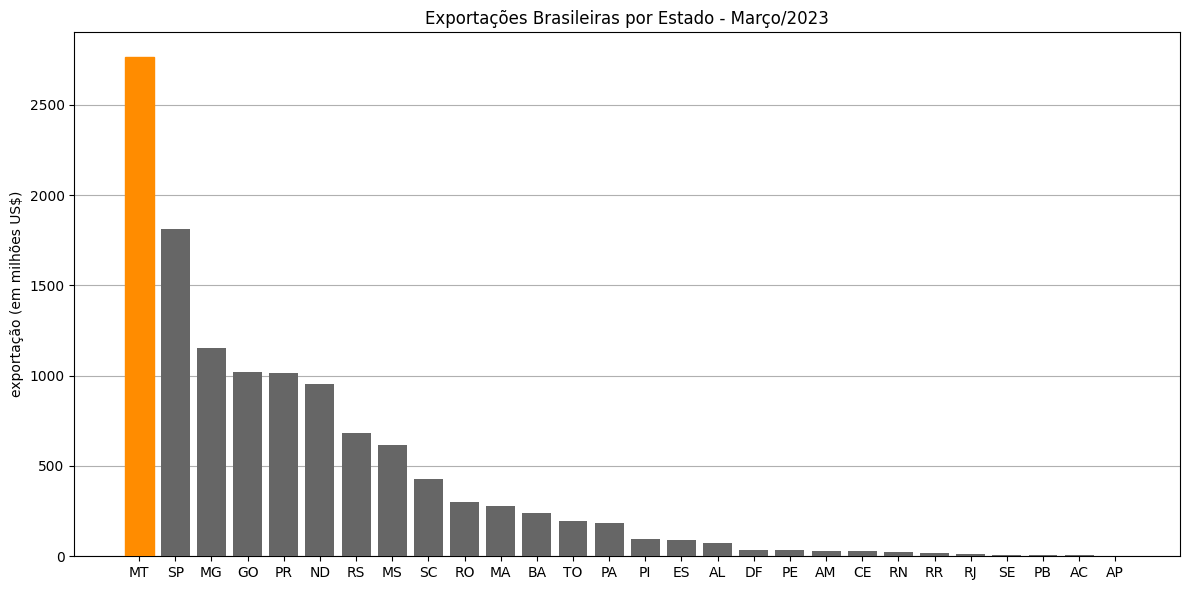

In [29]:
# Efetua o agrupamento da soma das exportações por UF
dfExpAgrupadoUF = dfNewExp.groupby('SG_UF_NCM')['VL_FOB'].sum().reset_index()

# Ordena o conjunto por VL_FOB
dfNewExpOrdenado = dfExpAgrupadoUF.sort_values(['VL_FOB'], ascending = False)

# Prepara a figura (fig) e a área do gráfico (ax)
fig, ax = plt.subplots(figsize = (12, 6))

# Habilita a grade na área do gráfico e aplica ordem 0 para posicionar
# a grade por trás das barras
ax.grid(visible=True, zorder=0, axis='y')

# Plota o gráfico de barras
barras = ax.bar(x = dfNewExpOrdenado.SG_UF_NCM
                , height = dfNewExpOrdenado.VL_FOB/1e6
                , color = '#666666'
                , zorder = 3)

# Acrescenta um título ao gráfico
plt.title('Exportações Brasileiras por Estado - Março/2023')

# Define os rótulos dos eixos
plt.ylabel('exportação (em milhões US$)') 

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Considerando a ordenação por valor, será dado destaque a maior barra
# no gráfico
barras[0].set_color('#FF8C00')

# Exibe o gráfico
plt.show()


Mato Grosso é o estado brasileiro que se destacou nas exportações com quase 3 bi US$. No próximo gráfico, visualizaremos a principal seção da NCM responsável pelo impulsionamento das exportações. Um dado chamou atenção no eixo X que representa a UF: "ND". Esse dado foi identificado na análise exploratória - visualização de frequência, mas foi uma opção mantê-lo para comparativos futuros.

As possibilidades de composição desse atributo, inclusive "ND" são:

*   ND - Não Declarada
*   ED - Estados Diversos - Café
*   RE - Reexportação
*   MN - Mercadoria Nacionalizada
*   CB - Consumo de Bordo
*   EX - Exterior
*   ZN - Zona Não Declarada



### 6.2 Exportações US$ FOB por Seções da NCM

In [30]:
# Efetua o agrupamento da soma das exportações por Seção da NCM
dfExpAgrupadoSecao = dfNewExp.groupby('NO_SECAO_PT')['VL_FOB'].sum().reset_index()

dfNewExpOrdenado = dfExpAgrupadoSecao.sort_values(['VL_FOB'] , ascending=False)

print(dfNewExpOrdenado)


                                         NO_SECAO_PT        VL_FOB
4                          Produtos do reino vegetal  8.825718e+09
3  Produtos das indútrias alimentares; Bebidas, l...  1.589662e+09
0           Animais vivos e produtos do reino animal  1.330840e+09
1  Gorduras e óleos animais ou vegetais; Produtos...  3.513035e+08
5                                  Produtos minerais  8.476503e+06
2  Produtos das indústrias químicas ou indústrias...  2.585900e+04


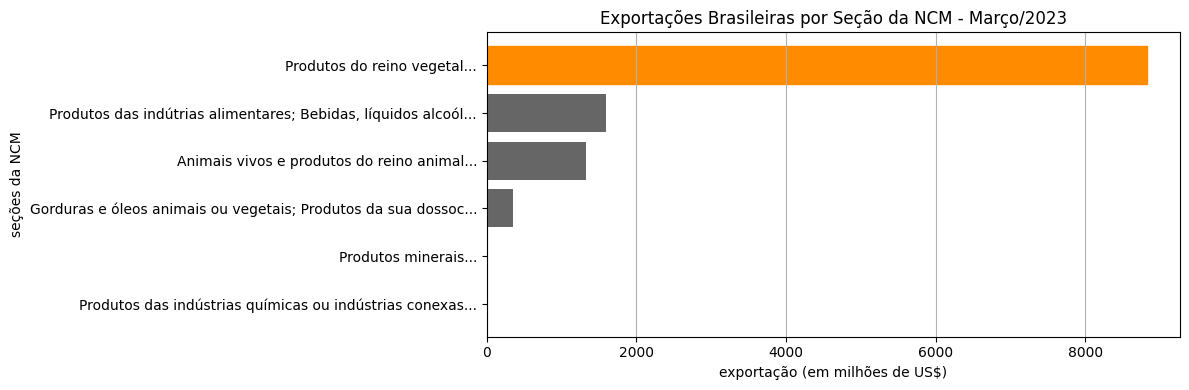

In [31]:
# Prepara a figura (fig) e a área do gráfico (ax) 
fig, ax = plt.subplots(figsize = (12, 4))

# Habilita a grade na área do gráfico e aplica ordem 0 para posicionar
# a grade por trás das barras
ax.grid(visible=True, zorder=0, axis='x')

# Plota o gráfico de barras e limita o texto do eixo Y a 60 caracteres
barras = ax.barh(y = dfNewExpOrdenado['NO_SECAO_PT'].str[:60] + '...'
, width = dfNewExpOrdenado['VL_FOB']/1e6, color = '#666666')

# Inverte o eixo Y
ax.invert_yaxis() 

# Acrescenta um título ao gráfico
plt.title('Exportações Brasileiras por Seção da NCM - Março/2023')

# Define o rótulo do eixo Y
plt.ylabel('seções da NCM')

# Define o rótulo do eixo X
plt.xlabel('exportação (em milhões de US$)')

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Considerando a ordenação por valor, será dado destaque a maior barra
# no gráfico
barras[0].set_color('#FF8C00')

# Exibe o gráfico
plt.show()

Considerando a visualização acima e o volume exportado na categoria "Produtos do reino vegetal...", imagina-se em primeira análise que a exportação do Mato Grosso esteja vinculada ao Agronegócio, mas isso tem necessidade de um gráfico composto com esses dois dados para fazer uma comparação mais real.


### 6.3 Exportações US$ FOB por Tipo de Transporte

In [32]:
# Efetua o agrupamento da soma das exportações por Tipo de Transporte
dfExpAgrupTransp = dfNewExp.groupby('NO_VIA')['VL_FOB'].sum().reset_index()

dfNewExpOrdenado = dfExpAgrupTransp.sort_values(['VL_FOB'] , ascending=False)

print(dfNewExpOrdenado)



                NO_VIA        VL_FOB
4             MARITIMA  1.173003e+10
6           RODOVIARIA  2.409078e+08
0                AEREA  7.017650e+07
3              FLUVIAL  5.752461e+07
7    VIA NAO DECLARADA  6.852261e+06
2          FERROVIARIA  4.277200e+05
8  VICINAL FRONTEIRICO  6.573300e+04
5       MEIOS PROPRIOS  3.737800e+04
1              EM MAOS  7.520000e+02


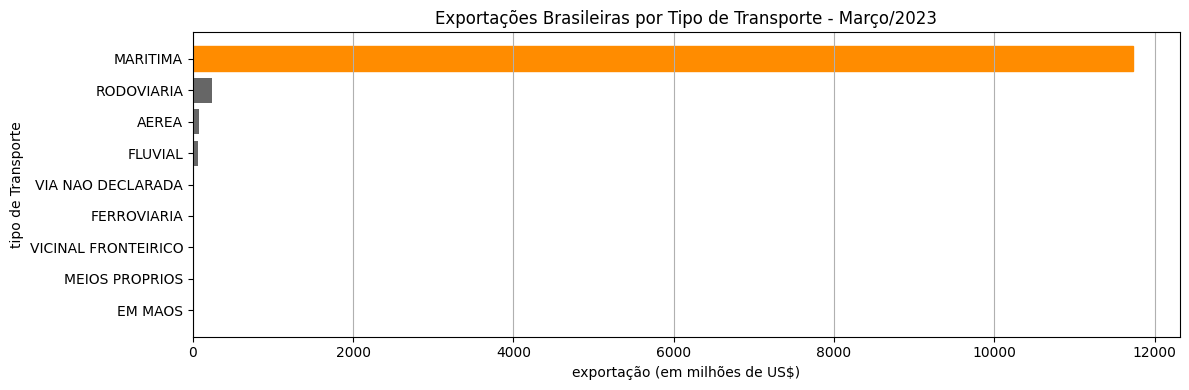

In [33]:
# Prepara a figura (fig) e a área do gráfico (ax) 
fig, ax = plt.subplots(figsize = (12, 4))

# Habilita a grade na área do gráfico e aplica ordem 0 para posicionar
# a grade por trás das barras
ax.grid(visible=True, zorder=0, axis='x')

# Plota o gráfico de barras
barras = ax.barh(y = dfNewExpOrdenado['NO_VIA']
, width = dfNewExpOrdenado['VL_FOB']/1e6, color = '#666666')

# Inverte o eixo Y
ax.invert_yaxis() 

# Acrescenta um título ao gráfico
plt.title('Exportações Brasileiras por Tipo de Transporte - Março/2023')

# Define o rótulo do eixo Y
plt.ylabel('tipo de Transporte')

# Define o rótulo do eixo X
plt.xlabel('exportação (em milhões de US$)')

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Considerando a ordenação por valor, será dado destaque a maior barra
# no gráfico
barras[0].set_color('#FF8C00')

# Exibe o gráfico
plt.show()

Percebe-se que o escoamento dos nossos produtos é massivamente feito por via 
Marítima. Daí a importância de investimento nos portos e estruturas aduaneiras
nesse setor. Além disso, abre-se várias oportunidades de estudos para melhorar
a logística de estocagem e identificação dos produtos.

### 6.4 Exportações Por Estado e Seção da NCM

Com base nos gráficos anteriores, é sabido que o Estado do Mato Grosso é o que 
mais exporta. Para validar a percepção anterior que o agronegócio é o maior produto exportado, precisamos comparar em um mesmo gráfico os 2 dados. Para não gerar um gráfico de visualização ruim, reduziremos a análise aos top 5.


Criando um novo dataframe com os top 5 UFs exportadoras e criando as agregações

In [34]:
# Agrupa as exportações por UF em US$ FOB
dfExpUF = dfNewExp.groupby('SG_UF_NCM')['VL_FOB'].sum().reset_index()

# Recupera os 5 maiores UFs por volume exportado em US$ FOB
dfTopFive = dfExpUF.sort_values(['VL_FOB'], ascending=False).head(5)

# Cria uma lista para ser usada para construção de um novo dataframe
lsUFs = dfTopFive['SG_UF_NCM'].values.tolist()

# Novo dataframe apenas com as UFs selecionadas
dfExpNewTopFive = dfNewExp.query('SG_UF_NCM in @lsUFs')

# Novo dataframe com colunas específicas
dfNewExpAgrupado = dfExpNewTopFive.loc[:
                             , ['CO_NCM_SECAO'
                             , 'SG_UF_NCM'
                             , 'VL_FOB']]

# Efetua o agrupamento por UF e Seção NCM
df2 = dfNewExpAgrupado.groupby(by=['CO_NCM_SECAO', 'SG_UF_NCM'],as_index=False).agg({'VL_FOB':['sum']})

# Nivela MultiIndex em colunas com map
df2.columns = df2.columns.map(''.join)

# Renomeando a coluna
df2 = df2.rename(columns={'VL_FOBsum':'VL_FOB'})

# Agrupa por UF e recupera o tamanho para geração dos agrupamentos no gráfico
df2Agrup = df2.groupby('SG_UF_NCM').size()


Cria o gráfico conjunto para tornar possível a comparação entre UFs e Seções


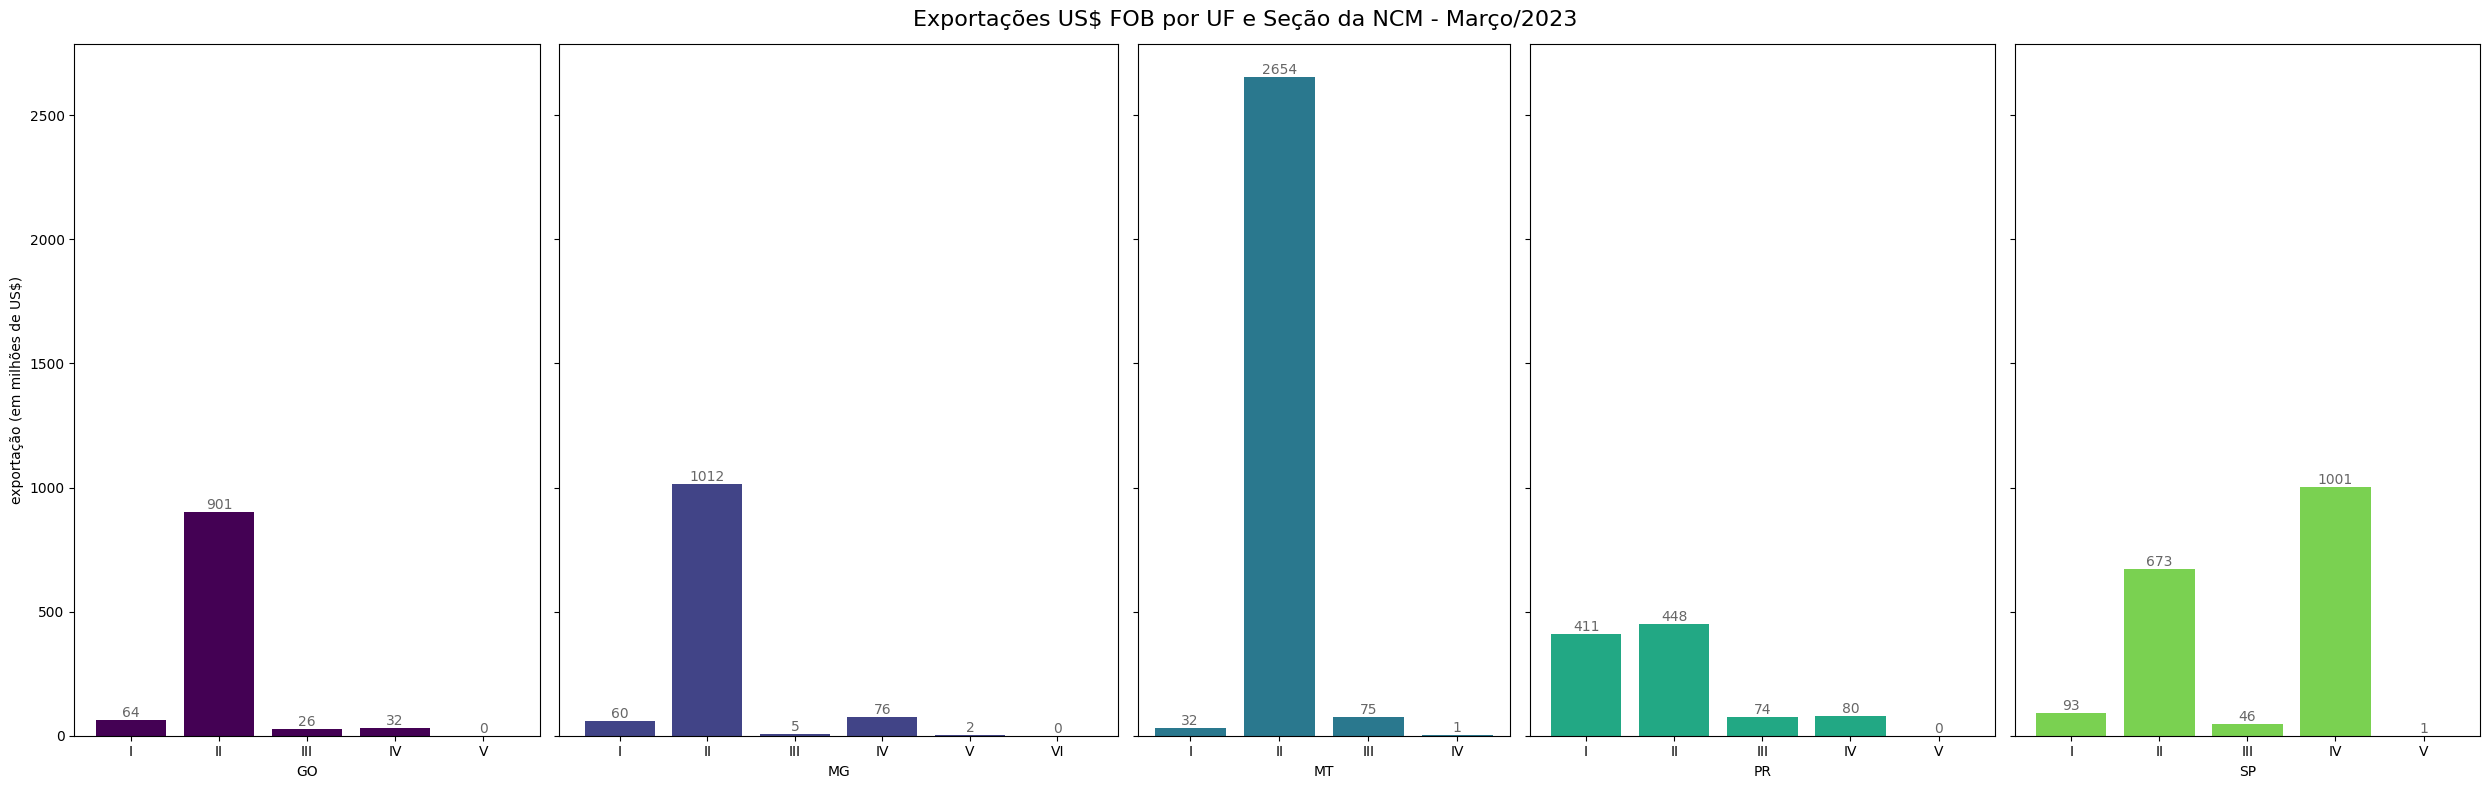

In [35]:
# Cria uma lista de cores para plotar o gráfico em diferentes agrupamentos
barCores = ['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

# Define base para gráficos: 1 linha com várias colunas:
# - ncols: número de colunas necessárias para as UFs
# - gridspec_kw: define a largura de cada subplot de acordo com o número de seções em cada UF
# - sharey: compartilha o eixo Y (parâmetro sharey), para permitir a comparação visual entre diferentes UFs
fig, axs = plt.subplots(nrows = 1, ncols = len(df2Agrup), 
                        figsize = (25, 8), 
                        sharey = "row",
                        gridspec_kw={"width_ratios": df2Agrup})

# Define gráficos de UFs para cada um dos slots definidos
for i in range(len(df2Agrup)):
    # Constrói gráfico de barra e Define label X com a UF associada
    axs[i].bar(x = df2[df2["SG_UF_NCM"] == df2Agrup.index[i]]['CO_NCM_SECAO'],
               height = df2[df2["SG_UF_NCM"] == df2Agrup.index[i]]['VL_FOB']/1e6, 
               color = barCores[i])
    
   
    # Exibe valores sobre cada barra
    axs[i].bar_label(axs[i].containers[0], fmt="%.0f", color="#666666")
    
    # Define rótulo do eixo X de cada subplot com a UF associada
    axs[i].set(xlabel = df2Agrup.index[i])


# Define rótulo do eixo Y somente para o primeiro plot 
# (por ser compartilhado com todos os gráficos daquela linha)
axs[0].set(ylabel = "exportação (em milhões de US$)")

# Habilita a grade na área do gráfico e aplica ordem 0 para posicionar
# a grade por trás das barras
ax.grid(visible=True)

# # Define título superior comum para todos os gráficos
fig.suptitle("Exportações US$ FOB por UF e Seção da NCM - Março/2023", fontsize=16)

# # Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# # Exibe o gráfico
plt.show()

Resumo das descrições das seções pois não caberia os textos no eixo do gráfico

In [36]:
display(dfExpNewTopFive[['CO_NCM_SECAO', 'NO_SECAO_PT']].drop_duplicates())

,CO_NCM_SECAO,NO_SECAO_PT
40002,I,Animais vivos e produtos do reino animal
48860,II,Produtos do reino vegetal
64791,III,Gorduras e óleos animais ou vegetais; Produtos...
65948,IV,"Produtos das indútrias alimentares; Bebidas, l..."
79589,V,Produtos minerais
79999,VI,Produtos das indústrias químicas ou indústrias...


 # 7. Conclusão
 
 Na análise preliminar, utilizando um conjunto de dados reduzido e fechando no
 escopo de Exportação, visualizasse que o Estado do Mato Grosso  foi o maior
 exportador de Março/2023 com o agronegócio despontando de longe como principal
 peso na balança. Contudo, dada a restrição do conjunto de dados, vê-se a 
 necessidade de se agrupar outros valores para gerar um conjunto mais aprimorado
 de teste. Outros datasets precisam ser incorporados nesse estudo se quisermos
 predizer qual área será tendência de exportação nos próximos anos. 